In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed (Hidden Input/Output)
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<div class="alert alert-block alert-info" >
    <h1 style="text-align:center;font-weight: 20px; color:black;">
       Will we be able to predict House Prices?<br></br> Let's find out... </h1>
</div>

 <p style="text-align:center; font-size:150%"><i><strong> “It's not the size of the house. It's how much love is inside” </i>– Martina McBride </strong></p>

<div class="alert alert-success">
    <h1 style="color:black">📄About the Data:</h1><br>
        <p style="color:black;font-size:120%;"> Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence. </p>
            <p style="color:black;font-size:120%;">With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.</p>
    
<h1 style="color:black">📄Problem Statement:</h1>   
    
<p style="color:black;font-size:120%;">Predicting the price of houses in Ames, Iowa.</p>   
    
</div>

<div class="alert alert-block alert-info" >
    <h1 style="text-align:center;font-weight: 20px; color:black;">
       Table of Contents </h1>
</div>

<div class="alert alert-success">
<ol>   
<li style="font-size:150%;color:black"><a href="#1" style="text-decoration:None"> Loading Data </a></li>
    
<li style="font-size:150%;color:black"><a href="#2" style="text-decoration:None"> Performing EDA using SweetViz </a></li>
    
<li style="font-size:150%;color:black"><a href="#3" style="text-decoration:None"> Data Cleaning after Analysis </a></li>
<ul>
<li style="font-size:150%;color:black"><a href="#4" style="text-decoration:None"> Dropping Necessary Columns </a></li>
    
<li style="font-size:150%;color:black"><a href="#5" style="text-decoration:None"> Imputing Missing Values </a></li>
    
<li style="font-size:150%;color:black"><a href="#6" style="text-decoration:None"> Handling Outliers </a></li>
</ul>    
<li style="font-size:150%;color:black"><a href="#11" style="text-decoration:None"> Importing and Cleaning the Test Data </a></li>   
    
<li style="font-size:150%;color:black"><a href="#7" style="text-decoration:None"> Preparing the data before Modelling </a></li>
    
<li style="font-size:150%;color:black"><a href="#8" style="text-decoration:None"> Model Building </a></li>
<ul>
<li style="font-size:150%;color:black"><a href="#9" style="text-decoration:None"> Lasso Regression </a></li>
    
<li style="font-size:150%;color:black"><a href="#10" style="text-decoration:None"> Ridge Regression </a></li>
</ul> 
</ol>    
  <h2 style="color:Black;">Legend:</h2>
    <p style="color:Black;font-size:120%">🎯: Important Steps or points</p>
    <p style="color:Black;font-size:120%">💎: Important tips</p>
    <p style="color:Black;font-size:120%">⭐: Reference Links</p>
    <p style="color:Black;font-size:120%">📄: Article, thread or informations</p>
</div>

    

<div class="alert alert-block alert-info" >
    <a id="1" style="text-decoration:None">
    <h1 style="text-align:center;font-weight: 20px; color:black;">
       Loading the Data </h1>
    </a>
</div>

In [ ]:
# Installing SweetViz (Hidden Input/Output)

!pip install sweetviz

In [ ]:
# Importing all the necessary libraries (Hidden Input)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sweetviz as sv
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [ ]:
# Creating the dataframe (Hidden Input)

df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

df.head().style.set_properties(**{'background-color': 'black',
                            'color': 'lawngreen',
                            'border-color': 'white', 'row_heading':'blue'})

In [ ]:
# Checking the number of rows and columns (Hidden Input)

print("Number of rows: ",df.shape[0])
print("Number of columns: ",df.shape[1])

<div class="alert alert-block alert-info" >
    <a id="2" style="text-decoration:None">
    <h1 style="text-align:center;font-weight: 20px; color:black;">
       Exploratory Data Analysis using SweetViz </h1>
    </a>
</div>

<div class="alert alert-success">
<p style="font-size:120%;color:black">🎯 <strong>SweetViz</strong> is an open-source Python library that generates beautiful, high-density visualizations to kickstart EDA (Exploratory Data Analysis) with just two lines of code. Output is a fully self-contained HTML application.</p>

<p style="font-size:120%;color:black">The system is built around quickly visualizing target values and comparing datasets. Its goal is to help quick analysis of target characteristics, training vs testing data, and other such data characterization tasks.</p>
    
<p style="font-size:120%;color:black">🎯 We are going to use SweetViz here, since there are a lot of features. Almost 81.</p>
    
<p style="font-size:120%;color:black">⭐ To understand better follow <a href="https://pypi.org/project/sweetviz/"> this </a> link</p>
</div>

In [ ]:
# EDA using SweetViz (Hidden Input)

my_report = sv.analyze(df)
my_report.show_notebook(  w=None, 
                h=None, 
                scale=None,
                layout='widescreen',
                filepath=None)

<div class="alert alert-block alert-info" >
    <a id="3" style="text-decoration:None">
    <h1 style="text-align:center;font-weight: 20px; color:black;">
       Data Cleaning after Analysis </h1>
    </a>
</div>

<div class="alert alert-block alert-info" >
    <a id="4" style="text-decoration:None">
    <h3 style="text-align:center;font-weight: 20px; color:black;">
       Dropping Unnecessary Columns </h3>
    </a>
</div>

<div class="alert alert-success">
    
<p style="font-size:120%;color:black">🎯 Firstly, we will drop any columns that have more than <strong>40% missing values</strong>.</p>
    
<p style="font-size:120%;color:black">🎯 Also by looking at the individual features, we can see that the following categorical features- <strong>'Street', 'LandContour','Utilities', 'LandSlope','Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical','BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType','SaleCondition'</strong> have one value that completely dominates other features. In this case, it is better to drop such columns, because deriving insights from them is useless.</p>
    
</div>

In [ ]:
# Columns to be dropped (Dropping columns with more than 40% missing values) (Hidden Input)

cols_to_drop = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','Id']

'''
Also by looking at the individual features, we can see that the following categorical features- 'Street', 'LandContour',
'Utilities', 'LandSlope','Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2',
'Heating', 'CentralAir', 'Electrical','BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond',
'PavedDrive', 'SaleType','SaleCondition' have one value that completely dominates other features. In this case, it is better
to drop such columns, because deriving insights from them is useless.
'''
drop = ['Street', 'LandContour','Utilities', 'LandSlope','Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond',
        'BsmtCond', 'BsmtFinType2','Heating', 'CentralAir', 'Electrical','BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual',
        'GarageCond','PavedDrive', 'SaleType','SaleCondition']

for cols in drop:
    cols_to_drop.append(cols)

df.drop(columns=cols_to_drop, axis=1, inplace=True)

<div class="alert alert-block alert-info" >
    <a id="5" style="text-decoration:None">
    <h3 style="text-align:center;font-weight: 20px; color:black;">
       Imputing missing values </h3>
    </a>
</div>

<div class="alert alert-success">
    
<p style="font-size:120%;color:black">🎯 Firstly, for the feature <strong>Lot Frontage</strong> we see a lot of missing values. About <strong>18%</strong> of the data is missing. When we refer to the Metadata file that we have, this feature refers to the <strong>Linear feet of street connected to property</strong>. In this case, the missing values suggest that for the houses without this data are probably those ones, that are situated away from the street. In this case we will <strong>impute the missing values with 0</strong>.</p>
    
<p style="font-size:120%;color:black">🎯 Next, we can observe that there are few missing values for <strong>MasVnrType</strong> and <strong>MasVnrArea</strong>. Less than <strong>1%</strong>. In this case, we will <strong>impute the missing values with None and 0 respectively</strong>.</p>
    
<p style="font-size:120%;color:black">🎯 For <strong>BsmtQual</strong>, <strong>BsmtFinType1</strong> and <strong>BsmtExposure</strong>, there are <strong>3%</strong> missing values. This is due to the fact that, not all house will have a basement. In-case of these, we will introduce a new value in the feature: <strong>No Basement</strong>.</p>

<p style="font-size:120%;color:black">🎯 Lastly, for the features- <strong>GarageType</strong>, <strong>GarageYrBlt</strong> and <strong>GarageFinish</strong>, we have about <strong>3%</strong> missing values. This is due to, unavailability of Garage along with the property. In this case, we will impute these missing values by a new value: <strong>No Garage</strong> for GarageType and GarageFinish. However, for the <strong>GarageYrBlt</strong>, we will impute the missing values here with <strong>0</strong> no available year.</p> 
    
</div>

In [ ]:
# Performing all the above mentioned manipulations (Hidden Input)

# For LotFrongtage:

df["LotFrontage"].fillna(0, inplace=True)

# For MasVnrType and MasVnrArea:

df["MasVnrType"].fillna("None", inplace=True)
df["MasVnrArea"].fillna(0, inplace=True)

# For BsmtQual, BsmtFinType1 and BsmtExposure:

df["BsmtQual"].fillna("NoBasement", inplace=True)
df["BsmtFinType1"].fillna("NoBasement", inplace=True)
df["BsmtExposure"].fillna("NoBasement", inplace=True)

# For GarageType and GarageFinish:

df["GarageType"].fillna("NoGarage", inplace=True)
df["GarageFinish"].fillna("NoGarage", inplace=True)

# For GarageYrBlt

df["GarageYrBlt"].fillna(0, inplace=True)

<div class="alert alert-block alert-info" >
    <a id="6" style="text-decoration:None">
    <h3 style="text-align:center;font-weight: 20px; color:black;">
       Outlier Treatment </h3>
    </a>
</div>

In [ ]:
# Checking the Descriptive statistics of the numerical columns (Hidden Input)

df.describe(percentiles=[0.01,0.1,0.5,0.95,0.98,0.99]).T.style.bar(
    subset=['mean'],
    color='lightsalmon').background_gradient(
    subset=['std'], cmap='plasma').background_gradient(subset=['99%','98%'], cmap='plasma').background_gradient(
    subset=['max'], cmap='plasma')

<div class="alert alert-success">
    
<p style="font-size:120%;color:black">🎯 By comparing the <strong>98th, 99th</strong> and <strong>100th</strong> percentile, we can see that the numerical features: <strong>LotArea, BsmtFinSF1, TotalBsmtSF, 1stFlrSF, GrLivArea, MiscVal</strong> have outliers.</p>
    
<p style="font-size:120%;color:black">🎯 On the other hand checking <strong>0th</strong> and <strong>1st</strong> percentile, we can see that most numerical features do not have outliers.</p>
    
</div>

In [ ]:
# Outlier treatment (Hidden Input)

out_cols = ["LotArea", "BsmtFinSF1", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "MiscVal"]

for col in out_cols:
    Q3 = df[col].quantile(0.99)
    df = df[df[col] <= Q3]

In [ ]:
df.shape

<div class="alert alert-block alert-info" >
    <a id="12" style="text-decoration:None">
    <h1 style="text-align:center;font-weight: 20px; color:black;">
       Importing and Cleaning the Test Data </h1>
    </a>
</div>

In [ ]:
# Reading the test data (Hidden Input)

df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

df_test.head().style.set_properties(**{'background-color': 'black',
                            'color': 'lawngreen',
                            'border-color': 'white', 'row_heading':'blue'})

In [ ]:
# EDA using SweetViz (Hidden Input)

my_report = sv.analyze(df_test)
my_report.show_notebook(w=None, 
                h=None, 
                scale=None,
                layout='widescreen',
                filepath=None)

In [ ]:
# Columns to be dropped (Dropping columns with more than 40% missing values) (Hidden Input)

cols_to_drop = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','Id']

'''
Also by looking at the individual features, we can see that the following categorical features- 'Street', 'LandContour',
'Utilities', 'LandSlope','Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2',
'Heating', 'CentralAir', 'Electrical','BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond',
'PavedDrive', 'SaleType','SaleCondition' have one value that completely dominates other features. In this case, it is better
to drop such columns, because deriving insights from them is useless.
'''
drop = ['Street', 'LandContour','Utilities', 'LandSlope','Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond',
        'BsmtCond', 'BsmtFinType2','Heating', 'CentralAir', 'Electrical','BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual',
        'GarageCond','PavedDrive', 'SaleType','SaleCondition']

for cols in drop:
    cols_to_drop.append(cols)

df_test.drop(columns=cols_to_drop, axis=1, inplace=True)

In [ ]:
# Performing all the above mentioned manipulations (Hidden Input)

# For LotFrongtage:

df_test["LotFrontage"].fillna(0, inplace=True)

# For MsZoning:

df_test["MSZoning"].fillna("RL", inplace=True)

# For Exterior1st and Exterior2nd:

df_test["Exterior1st"].fillna("VinylSd", inplace=True)
df_test["Exterior2nd"].fillna("VinylSd", inplace=True)

# For MasVnrType and MasVnrArea:

df_test["MasVnrType"].fillna("None", inplace=True)
df_test["MasVnrArea"].fillna(0, inplace=True)

# For BsmtQual, BsmtFinType1, BsmtExposure etc:

df_test["BsmtQual"].fillna("NoBasement", inplace=True)
df_test["BsmtFinType1"].fillna("NoBasement", inplace=True)
df_test["BsmtExposure"].fillna("NoBasement", inplace=True)
df_test["BsmtFinSF1"].fillna(0, inplace=True)
df_test["BsmtFinSF2"].fillna(0, inplace=True)
df_test["BsmtUnfSF"].fillna(0, inplace=True)
df_test["TotalBsmtSF"].fillna(0, inplace=True)
df_test["BsmtFullBath"].fillna("0", inplace=True)

# For GarageType and GarageFinish etc:

df_test["GarageType"].fillna("NoGarage", inplace=True)
df_test["GarageFinish"].fillna("NoGarage", inplace=True)

# For GarageYrBlt etc

df_test["GarageYrBlt"].fillna(0, inplace=True)
df_test["GarageArea"].fillna(480, inplace=True)
df_test["GarageCars"].fillna(0, inplace=True)

# For KitchenQual

df_test["KitchenQual"].fillna("TA", inplace=True)

In [ ]:
df_test.shape

<div class="alert alert-block alert-info" >
    <a id="7" style="text-decoration:None">
    <h1 style="text-align:center;font-weight: 20px; color:black;">
       Preparing the data before Model Building </h1>
    </a>
</div>

In [ ]:
# Concatenating both train and test data (This is done to handle all the different category value possibilites )

# Thanks to Krish Naik's tutorial (https://www.youtube.com/watch?v=vtm35gVP8JU)

final_df = pd.concat([df, df_test], axis=0)

final_df.shape

In [ ]:
# Creating the dummy variables for all the categorical features

cat_cols = list(final_df.select_dtypes("object"))

for col in cat_cols:
    dummy_cols = pd.get_dummies(final_df[col], drop_first=True, prefix=col)
    final_df = pd.concat([final_df,dummy_cols],axis=1)
    final_df.drop(columns=col, axis=1, inplace=True)

In [ ]:
# Removing any duplicates

final_df = final_df.loc[:,~final_df.columns.duplicated()]

In [ ]:
# Splitting into df_train and df_test

df_train = final_df.iloc[:1372,:]
df_test = final_df.iloc[1372:,:]

print(df_train.shape)
print(df_test.shape)

In [ ]:
# Dropping the "SalePrice" column from df_test

df_test.drop(columns="SalePrice", axis=1, inplace=True)

In [ ]:
# Splitting the data into train and test

y_train = df_train.pop("SalePrice")
X_train = df_train

In [ ]:
# Normalizing the data (Reason: Normalizing the data will have even the outlier values in the range of 0 to 1)

num_cols = list(df_train.select_dtypes(["int64","float64"]))

scaler = MinMaxScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [ ]:
num_cols_test = list(df_test.select_dtypes(["int64","float64"]))

df_test[num_cols_test] = scaler.transform(df_test[num_cols_test])

<div class="alert alert-block alert-info" >
    <a id="8" style="text-decoration:None">
    <h1 style="text-align:center;font-weight: 20px; color:black;">
       Model Building </h1>
    </a>
</div>

In [ ]:
# Using RFE to select the features...

lr = LinearRegression()
lr.fit(X_train,y_train)
rfe = RFE(lr,70)
rfe.fit(X_train,y_train)

In [ ]:
# Creating a column for all the RFE features

rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']
rfe_scores

In [ ]:
# Columns selected by RFE...

rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

# Creating our X_train and X_test with the select columns...

X_train = X_train[rfe_sel_columns]

<div class="alert alert-block alert-info" >
    <a id="9" style="text-decoration:None">
    <h3 style="text-align:center;font-weight: 20px; color:black;">
       Lasso Regression </h3>
    </a>
</div>

In [ ]:
# Using Lasso Regression

ls = Lasso(alpha=0.001)
ls.fit(X_train,y_train)

y_train_pred = ls.predict(X_train)
print("R2 score on the training data: " + str(r2_score(y_true=y_train,y_pred=y_train_pred)))
print("RMSE for our training data: " + str(np.sqrt(mean_squared_error(y_train,y_train_pred))))

<div class="alert alert-block alert-info" >
    <a id="10" style="text-decoration:None">
    <h3 style="text-align:center;font-weight: 20px; color:black;">
       Ridge Regression </h3>
    </a>
</div>

In [ ]:
# Using Ridge Regression

ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print("R2 Score for our training data: " + str(r2_score(y_train,y_train_pred)))
print("RMSE for our training data: " + str(np.sqrt(mean_squared_error(y_train,y_train_pred))))

<div class="alert alert-block alert-info" >
    <a id="11" style="text-decoration:None">
    <h3 style="text-align:center;font-weight: 20px; color:black;">
       ElasticNet Regression </h3>
    </a>
</div>

In [ ]:
# Using Ridge Regression

en = ElasticNet(alpha=0.001)
en.fit(X_train,y_train)

y_train_pred = en.predict(X_train)
print("R2 Score for our training data: " + str(r2_score(y_train,y_train_pred)))
print("RMSE for our training data: " + str(np.sqrt(mean_squared_error(y_train,y_train_pred))))

<div class="alert alert-block alert-info" >
    <a id="13" style="text-decoration:None">
    <h1 style="text-align:center;font-weight: 20px; color:black;">
       Predicting on Test Data </h1>
    </a>
</div>

In [ ]:
# Reading the sample_submission.csv

submission = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [ ]:
my_predictions = pd.DataFrame(en.predict(df_test[rfe_sel_columns]))

datasets = pd.concat([submission['Id'],my_predictions], axis=1)

datasets.columns = ['Id','SalePrice']

datasets.to_csv('submission.csv', index=False)

<div class="alert alert-block alert-info" >
    <a id="14" style="text-decoration:None">
    <h1 style="text-align:center;font-weight: 20px; color:black;">
       The Result </h1>
    </a>
</div>

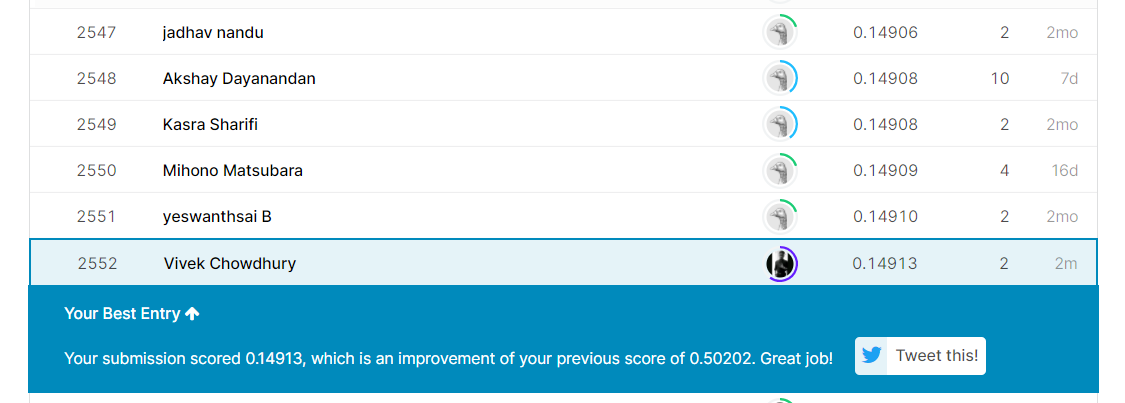

<div class="alert alert-block alert-info">
    
<h1 style="text-align:center;font-weight: 20px; color:black;">👷‍♂️⚠Notebook Still Under Construction⚠👷‍♂️ </h1>
    
</div>